In [1]:
import pandas
import numpy
import matplotlib.pyplot as plotter

## Data Exploration

Check data file to see format of data

In [2]:
data = pandas.read_csv("/home/adityas/Downloads/tsdata.txt", header=None, sep=" ")

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.228140,0.982114,0.203350,0.762215,0.817566,0.692994,0.560705,0.708696,0.036489,0.985397,...,0.768792,0.978883,0.924618,0.998504,0.016131,0.526377,0.491974,0.772898,0.276247,0.882477
1,0.300618,0.356176,0.344951,0.314235,0.857501,0.129979,0.978867,0.679469,0.437408,0.940998,...,0.479369,0.384257,0.678695,0.260913,0.173914,0.242879,0.741964,0.204856,0.043523,0.756572
2,0.377762,0.843173,0.643867,0.708604,0.958044,0.562362,0.863022,0.469913,0.593948,0.342953,...,0.155654,0.099215,0.320136,0.830554,0.924099,0.212418,0.220176,0.603006,0.606584,0.237988
3,0.894529,0.870098,0.018727,0.205056,0.452898,0.962347,0.457752,0.236797,0.871957,0.500286,...,0.161019,0.351905,0.307499,0.041254,0.115332,0.688905,0.767418,0.768927,0.310229,0.044500
4,0.830074,0.064459,0.217337,0.461841,0.722277,0.324039,0.250524,0.176191,0.582289,0.438759,...,0.701386,0.409617,0.329140,0.304847,0.814794,0.109046,0.640333,0.502412,0.214843,0.672769
5,0.231080,0.237137,0.347617,0.367470,0.836316,0.838701,0.408907,0.379308,0.662869,0.872006,...,0.315498,0.786788,0.268912,0.995928,0.257185,0.205353,0.666713,0.851663,0.430388,0.453579
6,0.685778,0.431604,0.616768,0.539667,0.597204,0.731244,0.975625,0.629560,0.429844,0.146580,...,0.521115,0.959878,0.150779,0.864409,0.174178,0.970073,0.469958,0.353836,0.604787,0.369518
7,0.402568,0.379240,0.514450,0.679610,0.802298,0.513218,0.585735,0.287397,0.713588,0.122993,...,0.122323,0.367383,0.498866,0.952199,0.729739,0.388756,0.272458,0.985817,0.961873,0.262172
8,1.999155,2.518432,1.140963,1.970444,3.693101,2.290671,3.204367,1.591799,2.001049,2.299000,...,1.487852,2.248424,1.713295,3.237907,1.898816,1.650617,1.871941,2.599266,1.643678,1.898106


Transpose matrix to convert in form of (samples, dim)

In [4]:
data = pandas.DataFrame(data.as_matrix().T, columns=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"])

In [5]:
data.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,y
0,0.228140,0.300618,0.377762,0.894529,0.830074,0.231080,0.685778,0.402568,1.999155
1,0.982114,0.356176,0.843173,0.870098,0.064459,0.237137,0.431604,0.379240,2.518432
2,0.203350,0.344951,0.643867,0.018727,0.217337,0.347617,0.616768,0.514450,1.140963
3,0.762215,0.314235,0.708604,0.205056,0.461841,0.367470,0.539667,0.679610,1.970444
4,0.817566,0.857501,0.958044,0.452898,0.722277,0.836316,0.597204,0.802298,3.693101


Get basic statistics

In [6]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,y
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.502227,0.501187,0.502631,0.499017,0.509079,0.494824,0.496669,0.496004,2.071018
std,0.289189,0.284307,0.289173,0.282207,0.286602,0.290773,0.287397,0.291552,0.679339
min,0.000214,0.000731,0.002084,0.001759,0.000033,0.000115,0.000260,0.000434,0.308222
25%,0.254177,0.250829,0.250566,0.255761,0.270903,0.248765,0.246312,0.241237,1.581158
50%,0.503411,0.498205,0.501444,0.500057,0.515223,0.481590,0.498837,0.490976,2.039872
75%,0.759510,0.749602,0.755240,0.736539,0.758971,0.750578,0.744014,0.755848,2.522218
max,0.999662,0.999914,0.998706,0.999734,0.999994,0.999893,0.998439,0.999473,4.382411


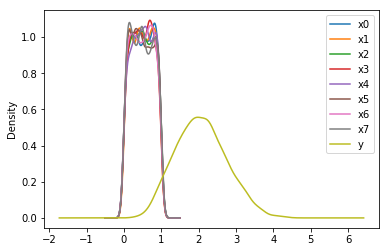

In [7]:
data.plot(kind="density")
plotter.show()

Data looks normally distributed but not centered.

## Preprocessing tests

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
mmscaler = MinMaxScaler()
stscaler = StandardScaler()

In [10]:
scaled_data = pandas.DataFrame(mmscaler.fit_transform(data), columns=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"])
centered_data = pandas.DataFrame(stscaler.fit_transform(data), columns=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"])

For scaled data
                x0           x1           x2           x3           x4  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.502290     0.500865     0.502244     0.498267     0.509066   
std       0.289348     0.284539     0.290153     0.282780     0.286613   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.254104     0.250302     0.249325     0.254517     0.270880   
50%       0.503475     0.497880     0.501053     0.499309     0.515210   
75%       0.759715     0.749483     0.755709     0.736270     0.758968   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                x5           x6           x7            y  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.494819     0.497314     0.496047     0.432674  
std       0.290837     0.287922     0.291832     0.166742  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.24870

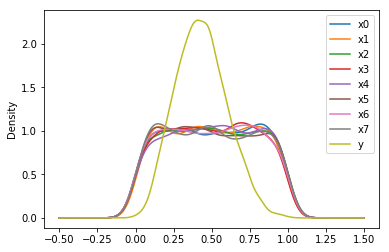

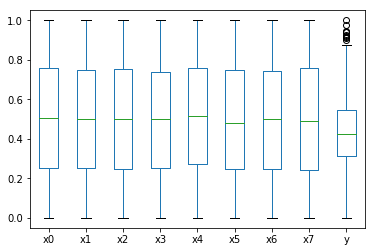

For mean centered data
                 x0            x1            x2            x3            x4  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   2.516209e-15  1.985967e-15 -4.822809e-16 -8.490986e-16  2.993161e-16   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.736369e+00 -1.760707e+00 -1.731394e+00 -1.762473e+00 -1.776587e+00   
25%   -8.579567e-01 -8.808106e-01 -8.718937e-01 -8.621945e-01 -8.312427e-01   
50%    4.095609e-03 -1.049155e-02 -4.108251e-03  3.685119e-03  2.144146e-02   
75%    8.898925e-01  8.739763e-01  8.737720e-01  8.418675e-01  8.721310e-01   
max    1.720536e+00  1.754627e+00  1.715920e+00  1.774734e+00  1.713307e+00   

                 x5            x6            x7             y  
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  
mean   4.424461e-15 -5.471179e-16 -1.175948e-15  1.548095e-15  
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  
min   -1.

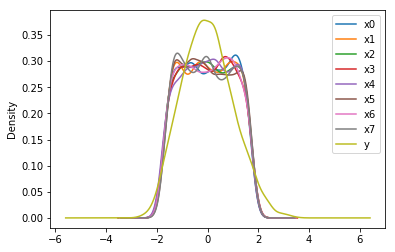

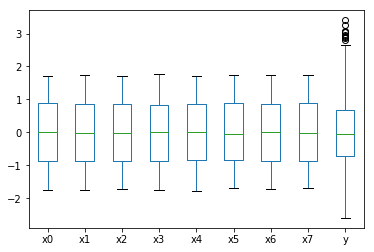

In [11]:
print("For scaled data")
print(scaled_data.describe())
scaled_data.plot(kind="density")
plotter.show()
scaled_data.plot(kind="box")
plotter.show()
print("For mean centered data")
print(centered_data.describe())
centered_data.plot(kind="density")
plotter.show()
centered_data.plot(kind="box")
plotter.show()

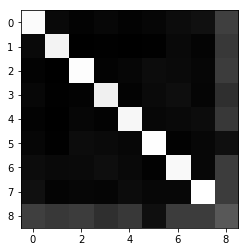

In [12]:
cov = numpy.cov(scaled_data.as_matrix().T)
plotter.imshow(cov, cmap="gray")
plotter.show()

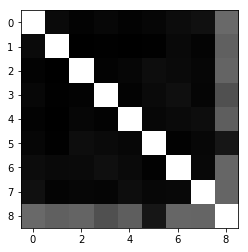

In [13]:
cov = numpy.cov(centered_data.as_matrix().T)
plotter.imshow(cov, cmap="gray")
plotter.show()

Scaling data suppresses X to a greater amount than centering. So it will be a good idea to center instead of scale.

In [14]:
# Clean up
del scaled_data
del centered_data

## Try learning

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
s_scaler = StandardScaler()
data = pandas.DataFrame(s_scaler.fit_transform(data), columns=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"])
data.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,y
0,-0.948016,-0.705643,-0.431922,1.401848,1.120281,-0.907273,0.658170,-0.320557,-0.105809
1,1.659839,-0.510177,1.177934,1.315252,-1.551737,-0.886437,-0.226448,-0.400590,0.658768
2,-1.033760,-0.549671,0.488534,-1.702332,-1.018190,-0.506387,0.417989,0.063285,-1.369401
3,0.899251,-0.657736,0.712459,-1.041909,-0.164863,-0.438094,0.149649,0.629912,-0.148083
4,1.090700,1.253587,1.575271,-0.163464,0.744065,1.174725,0.349902,1.050829,2.388336


In [17]:
y = data["y"]
X = data.drop("y", axis=1)

In [18]:
y.head(5)

0   -0.105809
1    0.658768
2   -1.369401
3   -0.148083
4    2.388336
Name: y, dtype: float64

In [19]:
X.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7
0,-0.948016,-0.705643,-0.431922,1.401848,1.120281,-0.907273,0.658170,-0.320557
1,1.659839,-0.510177,1.177934,1.315252,-1.551737,-0.886437,-0.226448,-0.400590
2,-1.033760,-0.549671,0.488534,-1.702332,-1.018190,-0.506387,0.417989,0.063285
3,0.899251,-0.657736,0.712459,-1.041909,-0.164863,-0.438094,0.149649,0.629912
4,1.090700,1.253587,1.575271,-0.163464,0.744065,1.174725,0.349902,1.050829


In [20]:
X = X.as_matrix()
y = y.as_matrix()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model training

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Basic Ridge regression

In [23]:
from sklearn.linear_model import Ridge

In [24]:
clf = Ridge(alpha=0.01, solver='auto')

In [25]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(mean_squared_error(y_pred=pred, y_true=y_test))
print(mean_absolute_error(y_pred=pred, y_true=y_test))

0.06749477659585798
0.2102513064723923


[0.39338716 0.38483295 0.38950417 0.31271367 0.36024998 0.06007276
 0.3519686  0.36307641]
0.0016987424763075833


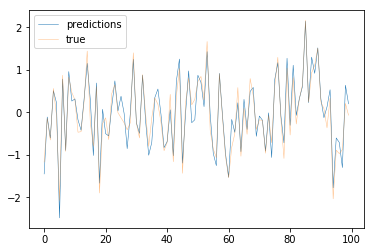

In [26]:
print(clf.coef_)
print(clf.intercept_)
plotter.plot(pred[:100], label="predictions", linewidth=0.5)
plotter.plot(y_test[:100], label="true", linewidth=0.5, alpha=0.5)
plotter.legend()
plotter.show()

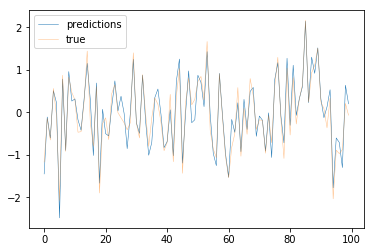

In [27]:
plotter.plot(pred[:100], label="predictions", linewidth=0.5)
plotter.plot(y_test[:100], label="true", linewidth=0.5, alpha=0.5)
plotter.legend()
plotter.show()

#### Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet

In [29]:
reg = ElasticNet(alpha=0.01)

In [30]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print(mean_squared_error(y_pred=pred, y_true=y_test))
print(mean_absolute_error(y_pred=pred, y_true=y_test))

0.06838344227004302
0.21230876928586986


[0.38685596 0.37748698 0.38240201 0.30559114 0.35309984 0.05482017
 0.34562573 0.35675837]
0.0013061246751817981


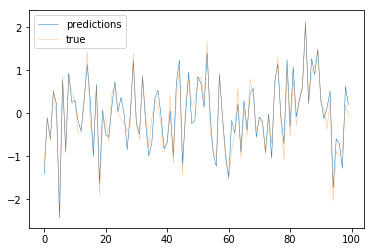

In [31]:
print(reg.coef_)
print(reg.intercept_)
plotter.plot(pred[:100], label="predictions", linewidth=0.5)
plotter.plot(y_test[:100], label="true", linewidth=0.5, alpha=0.5)
plotter.legend()
plotter.show()

#### Decision Tree (Non linear)

In [32]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [33]:
reg = DecisionTreeRegressor(max_depth=5)

In [34]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print(mean_squared_error(y_pred=pred, y_true=y_test))
print(mean_absolute_error(y_pred=pred, y_true=y_test))

0.4974931318932765
0.5665570717646758


[0.22360151 0.11247054 0.18616386 0.03273141 0.14400354 0.
 0.15916248 0.14186665]


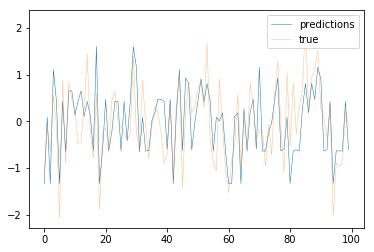

In [35]:
print(reg.feature_importances_)
plotter.plot(pred[:100], label="predictions", linewidth=0.5)
plotter.plot(y_test[:100], label="true", linewidth=0.5, alpha=0.5)
plotter.legend()
plotter.show()

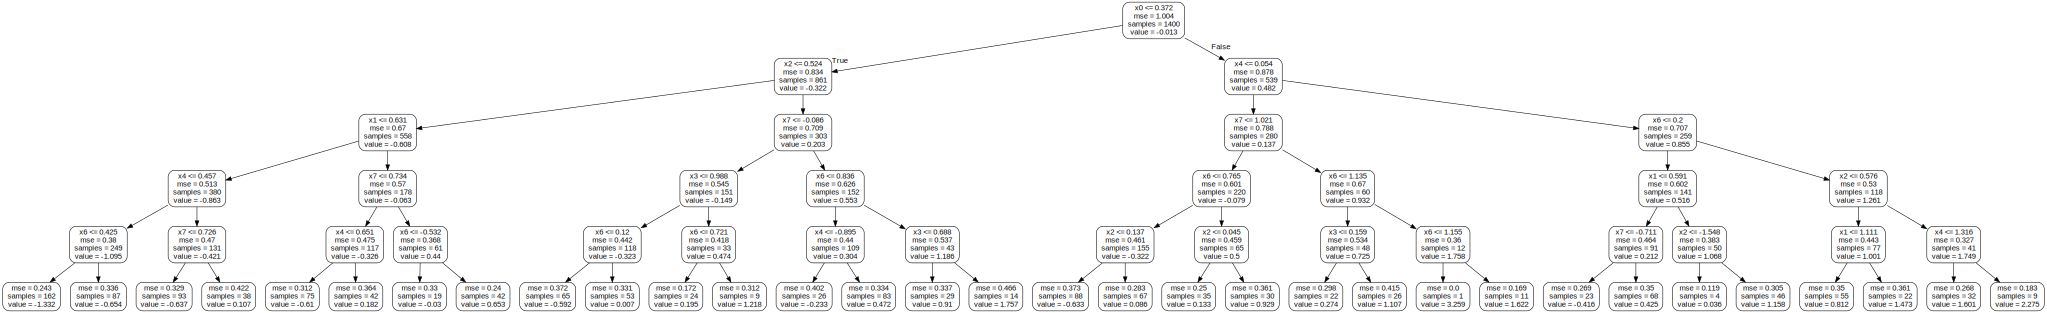

In [36]:
import graphviz
dot = export_graphviz(reg, out_file=None, feature_names=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7"], class_names=["y"], rounded=True)
graph = graphviz.Source(dot)
graph

Decision Tree performs worse than linear models.

#### Ensemble Methods

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
reg = RandomForestRegressor(n_estimators=20)

In [39]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print(mean_squared_error(y_pred=pred, y_true=y_test))
print(mean_absolute_error(y_pred=pred, y_true=y_test))

0.12074428056668542
0.2714541425524689


[0.18599866 0.14984451 0.17892966 0.07445272 0.13023412 0.0150459
 0.13310541 0.13238902]


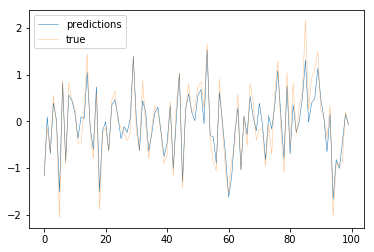

In [40]:
print(reg.feature_importances_)
plotter.plot(pred[:100], label="predictions", linewidth=0.5)
plotter.plot(y_test[:100], label="true", linewidth=0.5, alpha=0.5)
plotter.legend()
plotter.show()

Non linear methods are performing worse than linear ones.

Data is too less to try a neural network. 